<div style="font-size:12px;">

## *`COVID-19 Vaccinations & Obesity Across Ethnic Groups`*
### Group name: **Mamba Mentality**
### Group members - Contributions:
- Talha Adnan - Created and contributed towards most of the project including working on the EDAs, cleaning, manipulation and the creation of final data that was to be worked upon. Also did the ML analysis and maintained the Git repository. Made the final report, with the final analysis along with strategic public health implications including the conclusion and last steps.
- Ameer Shehayber - Helped with the EDA.
- Ameen Rahman - Helped with EDA and provided the data sets.
- Musab Kazi - Created the final presentation and helped with EDA.
- Daniyal Khokhar - Had some challenges, could have contributed more. Appreciate the contribution on statistical analysis.

<div style="font-size:12px;">

_This file contains the report for the project._
_Link for the github reposistory that contains all of the source code and history of makings of the project: [Github Repo](https://github.com/uic-cs418/Mamba-Mentality)_

<div style="font-size:12px;">

### Project Introduction

**Context**: Amid the COVID-19 pandemic, we are exploring the intersections of ethnicity, obesity, and vaccination rates to understand health disparities.

**Focus Area**: Our research targets Chicago, examining the link between obesity rates and vaccination uptake, especially among minority groups facing greater healthcare barriers.

**Goals and Data**:
- **Primary Goal**: Analyze disparities from 2010 to 2024 to guide mitigation strategies.
- **Additional Objective**: Aid vaccine campaigns in effectively targeting minority groups.
- **Data Utilized**: Respiratory diseases, COVID-19 vaccination rates, and obesity statistics, segmented by demographics.

**Methods**:
- **Data Cleaning and Analysis**: Streamlined datasets are analyzed using regression techniques and data visualization to understand vaccination rates and obesity prevalence.

**Motivation**:
"Our motivation is driven by the need to improve public health responses in underserved communities."

**Vision**:
Our analysis seeks to inform a more effective public health framework that addresses health disparities amid ongoing health crises.

In [56]:
import main as af

<div style="font-size:12px;">

### Exploratory Data Analysis (EDA)

This section details our approach to preparing and analyzing the COVID-19 and vaccination datasets, focusing on trends and correlations from 2020 to 2023.

#### Data Cleaning and Manipulation

We refined the data to ensure its relevance to the COVID-19 timeline:

1. **Filtering by Season**: Selected data post-2018 to match the pandemic timeline.
2. **Date Conversion and Data Cleansing**: Converted 'week_start' and 'week_end' to datetime format and removed rows with missing critical data.
3. **Merging Datasets**: Combined respiratory virus surveillance and vaccination data by 'week_end' to examine vaccination trends alongside COVID-19 case data.

#### Python Code for Data Cleaning and Merging
The following Python code snippet demonstrates the data cleaning and merging steps:
```python
def clean_and_merge_data(df1, df2):
    # Convert date columns to datetime
    df1['week_start'] = pd.to_datetime(df1['week_start'])
    df1['week_end'] = pd.to_datetime(df1['week_end'])
    # Filter data for relevant seasons and remove rows with missing critical data
    df1 = df1[df1['season'] > '2018-2019']
    df1.dropna(subset=['pathogen', 'Vaccine Series Completed Percent'], inplace=True)
    # Prepare and clean vaccination data
    df2.rename(columns={'Week End': 'week_end'}, inplace=True)
    df2['week_end'] = pd.to_datetime(df2['week_end'])
    # Merge datasets on 'week_end'
    df_final = pd.merge(df1, df2, on='week_end', how='inner')
    df_final.dropna(inplace=True)
    
    return df_final

In [57]:
df1, df2 = af.load_data()
df_final = af.clean_data(df1, df2)

<div style="font-size:12px;">

#### Visualizations:
1. **Trend Analysis**: Examine how COVID-19 cases and vaccination rates have changed over time.
2. **Demographic Analysis**: Analyze vaccination rates across different demographics to identify disparities.
3. **Correlation Analysis**: Investigate potential correlations between COVID-19 case surges and changes in vaccination rates.

Let's start with the EDA by visualizing the trends of COVID-19 cases and vaccination rates over time and then across different demographics.

<div style="font-size:12px;">

#### `This graph tests the relation ship between the vaccination completion vs the Ethnicity of individuals over a period of time.`

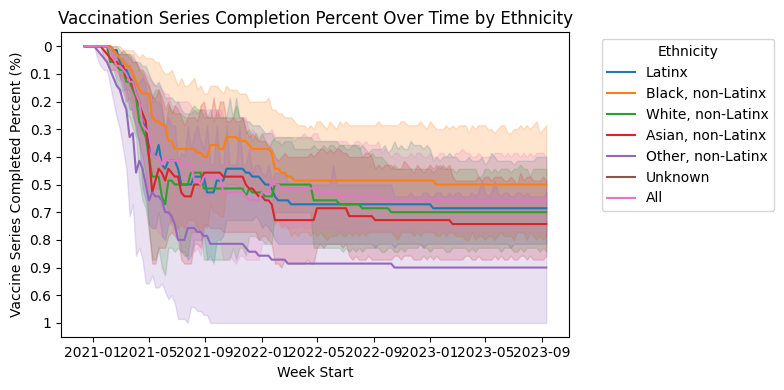

In [58]:
af.exploratory_data_analysis_1(df_final)

<div style="font-size:12px;">

#### Inference/Interpretation:
This graph shows how vaccination was least completed over a period of time for the Black, non-latinx group and the most was by Other, non-Latinx followed by Asian, non-Latinx

<div style="font-size:12px;">

#### `This graph shows the average vaccination completion percentages across different demographic groups.`
For this visualization we first needed to convert the `Vaccine Series completed` column to numeric

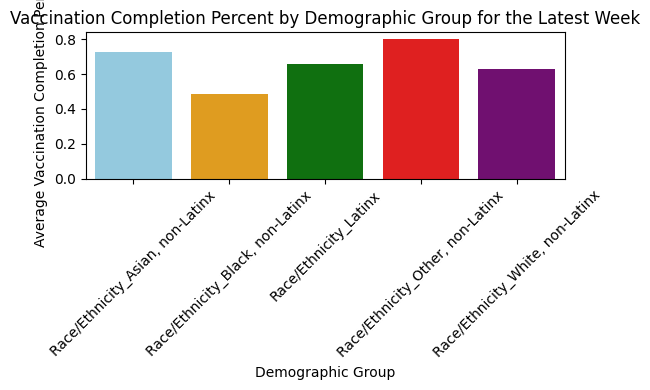

In [59]:
af.exploratory_data_analysis_2(df_final)

<div style="font-size:12px;">

#### Inference/Interpretation:
This graph shows the absolute average vaccination completion percent with regards to their Ethnicity.
This shows that the least vaccinated are the Black group and the most are the Asians but the surprising part is that it is not the whites as they are at a tie with the Latinx group.

<div style="font-size:12px;">

#### `Vaccine Metrics and Obesity by Race/Ethnicity Over Time`

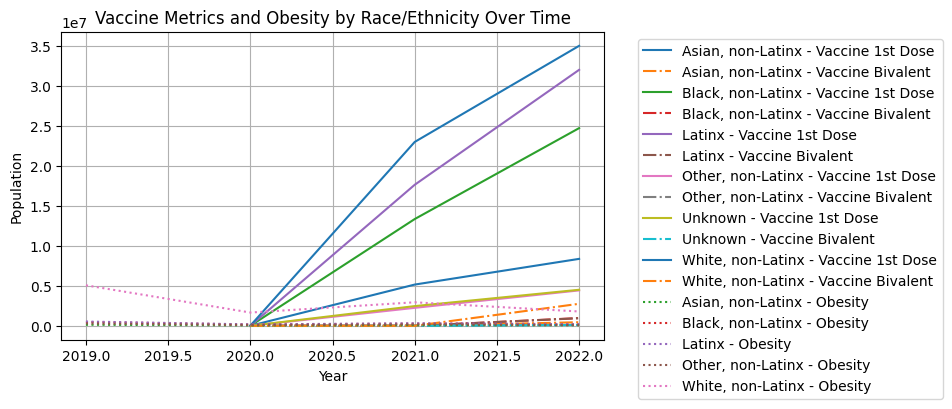

In [60]:
af.exploratory_data_analysis_3()

<div style="font-size:12px;">

### `Machine Learning Analysis`

This section of the report explores the development and evaluation of a machine learning model designed to analyze the impact of COVID-19 case increases on vaccination rates among different demographics. The process involves feature selection, model training, and performance evaluation.

#### Feature Selection

Feature selection is critical for improving model accuracy and interpretability. The selected features for our analysis include:
- **Temporal Features**: `week_start` converted to a numerical format to capture time trends.
- **COVID-19 Case Numbers**: `lab_tot_positive` or `lab_pct_positive` to measure the impact of COVID-19 spread.
- **Demographic Indicators**: One-hot encoded columns for `Race/Ethnicity` to assess disparities among different demographics.


<div style="font-size:12px;">

***The following Python code snippet demonstrates the Data Preparation and Feature Selection:***
First I prepare the data by converting data columns to numerical format, ensuring the target variable is numeric, and encoding categorical values. Here is a snippet on how I do it:
```python
def preprocessing(df_final_copy):
    df_final_copy['Vaccine Series Completed Percent'] = pd.to_numeric(df_final_copy['Vaccine Series Completed Percent'], errors='coerce')
    df_final_copy.dropna(subset=['Vaccine Series Completed Percent'], inplace=True)
    # One-hot encode the 'Race/Ethnicity' column
    df_processed = pd.get_dummies(df_final_copy, columns=['Race/Ethnicity'], drop_first=True)
    return df_processed
```
Next, I perform feature selection and split my data into training and testing sets. Here is a snippet on how I do it:
```python
def feature_selection(df_processed):
    X_features = ['days_since_start', 'lab_tot_positive'] + [col for col in df_processed.columns if col.startswith('Race/Ethnicity_')]
    y_feature = 'Vaccine Series Completed Percent'
    X_train, X_test, y_train, y_test = train_test_split(df_processed[X_features], df_processed[y_feature], test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test
```

<div style="font-size:12px;">

### Establishing a Baseline
We use a **mean model** as our baseline, calculating the average `Vaccine Series Completed Percent` from the training data to predict test set values. By comparing the Mean Squared Error (MSE) of this baseline to our model's MSE, we gauge model performance—a lower MSE signifies a better fit.


In [61]:
print(f"Base line MSE: {af.base_line_MSE(df_final)}")

Base line MSE: 0.12412773424902467


<div style="font-size:13px;">

#### Training the model, making predictions and printing out mse to compare to baseline:

In [62]:
mse_cleaned, coefficients_df, y_pred_cleaned, y_test_cleaned = af.train_and_evaluate_model(df_final)
print(f"Model MSE: {mse_cleaned}")

Model MSE: 0.09015084515057206


In [63]:
print("The model Coefficients are:")
coefficients_df

The model Coefficients are:


,Feature,Coefficient
5,"Race/Ethnicity_Other, non-Latinx",0.190503
3,"Race/Ethnicity_Black, non-Latinx",-0.121842
2,"Race/Ethnicity_Asian, non-Latinx",0.067921
4,Race/Ethnicity_Latinx,0.027071
0,days_since_start,0.000542
7,"Race/Ethnicity_White, non-Latinx",0.000517
1,lab_tot_positive,0.000026
6,Race/Ethnicity_Unknown,0.000000


<div style="font-size:12px;">

**Analyzing Model Coefficients and their Significance**: The magnitude and direction of coefficients indicate their impact. Positive coefficients suggest a direct relationship with vaccination rates, whereas negative coefficients imply an inverse relationship.

##### Key Interpretations and Implications:
**Demographic Disparities**:
- **Other, non-Latinx**: Shows the most significant positive influence, indicating potentially successful outreach and higher acceptance rates.
- **Black, non-Latinx**: Exhibits a negative coefficient, highlighting lower vaccination rates and the need for targeted public health initiatives.
- Other groups show varying influences, suggesting that tailored strategies could enhance vaccination rates across different demographics.

##### `Strategic Public Health Implications:` 
**Targeted Initiatives**: Addressing disparities is crucial for effective vaccination campaigns. 
**Enhanced Outreach and Education**: Specially for groups like the Black, non-Latinx community to address specific barriers and misinformation. 
**Monitoring and Adaptation**: Continuous analysis of trends and case numbers to guide proactive vaccination strategies.

<div style="font-size:12px;">

To visualize the regression analysis we performed, especially for a linear regression model, I have ploted the actual versus predicted values to assess how well the model fits the data.

`Visualization description:` This plot includes a dashed line representing perfect predictions (where actual values equal predicted values) to help visually assess the model's accuracy.  Points close to this line indicate accurate predictions, while points farther away represent larger discrepancies between the model's predictions and the actual data.

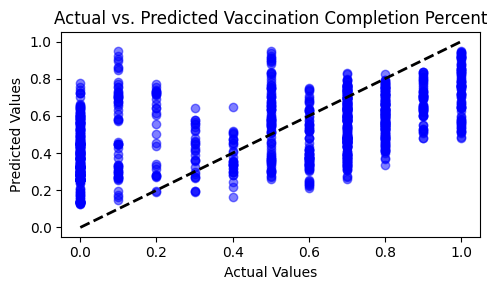

In [64]:
af.create_model_performane_graph(y_test_cleaned, y_pred_cleaned)

<div style="font-size:12px;">

#### `Stat Analysis`

- ***Health Promotion Efforts:*** 
By comparing the trends in vaccination rates and obesity rates over time, we can assess the effectiveness of health promotion efforts and interventions targeting specific racial/ethnic groups. 
- ***Socioeconomic Factors:*** 
The intersectionality of race/ethnicity, socioeconomic status, and health outcomes plays a significant role. Analyzing the relationship between vaccination metrics, obesity rates, and socioeconomic factors within racial/ethnic communities can provide insights into the underlying determinants of health disparities.



##### `Conclusion and Next Steps:` 
Ongoing efforts should focus on, 
- **Exploring Interaction Effects**: To understand complex dynamics between demographic factors and temporal trends. 
- **Alternative Modeling Approaches**: To gain deeper insights into vaccination influences, potentially through models capturing non-linear relationships or interactions.